In [167]:
# %%writefile Ind_BIAS_OSC.py

import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)

import Ind_Model_Base

import numpy as np
import pandas as pd

# import QUANTAXIS as QA

import matplotlib.pyplot as plt


import Analysis_Funs as af

import talib
# import base.JuUnits as ju

# %load_ext autoreload
# %autoreload 2
# %aimport Analysis_Funs,Ind_Model_Base


class BIAS(Ind_Model_Base.Ind_Model):
    """乖离率（BIAS）
        注：只2020，2021两年有效，越早越无效。使用前需要验证。
            特征信号有效性没有上面的问题，
    """
    optimum_param={'valid':True, 'main':'feature_BIAS_CONTINUITY_NEG_ABS', 'desition_direct':1, 'freq':'d','neutralize':{'enable':False,'static_mv':False}}
    
    def __init__(self,data, frequence='day'):#QA.FREQUENCE.DAY
        super().__init__(data, 'BIAS', frequence)
        self.renko_objs={}
        
        ### 正式使用时由实例设置为true来加速
#         self.set_ignore_sub_ind(False)
        

    def on_set_params_default(self):
        return {'BIAS_timeperiod':22, 'jcsc_ma':10}
    
        
    def on_indicator_structuring(self, data):
        return self.excute_for_multicode(data, self.kernel, **self.pramas)
    
    def on_desition_structuring(self, data, ind_data):
        """
        """
        def feature(item_df):
            direct = np.sign(item_df['BIAS'] - item_df['BIAS'].rolling(self.cur_pramas['jcsc_ma']).mean())
            return -1 * np.abs(af.timeline_event_continuity(direct.fillna(0)))
        
        event_continuity = self.excute_for_multicode(self.ind_df,
                                         lambda x: pd.DataFrame(feature(x),
                                         index=x.index,
                                         columns=['feature_BIAS_CONTINUITY_NEG_ABS']))
        self.ind_df = pd.concat([self.ind_df, event_continuity],axis=1)
        return event_continuity
        
    def kernel(self,dataframe, BIAS_timeperiod, jcsc_ma):
        close = dataframe.close
        close_ma = close.rolling(BIAS_timeperiod).mean()

        bias = (close-close_ma)/close_ma
        bias.name = 'BIAS'
        

        return pd.DataFrame(bias)

    def plot(self):
        if self.fast_mode:
            raise 'fast_mode is True,cant draw chart'
        
        


In [168]:
%%time
import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)
import tools.Sample_Tools as smpl
import Analysis_Funs as af
import base.JuUnits as ju
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib


data = smpl.get_data(['000001'],end='2021-06-29',gap=504).data
# close = data.reset_index('code',drop=True).close

# close_ma = close.rolling(20).mean()
# close_ma.name = 'ma'

# bias = (close-close_ma)/close_ma
# # bias = -1*np.abs((close-close_ma)/close_ma)
# bias.name = 'bias'

# pd.concat([close,close_ma,bias],axis=1).plot(secondary_y=['bias'],figsize=(1620/72,420/72))
# plt.grid()
# plt.gca().axhline(0, linestyle='--', color='k',linewidth=1.2)
# print(type(bias))

a = BIAS(data)
a.fit()
a.ind_df

Wall time: 32 ms


,,BIAS,feature_BIAS_CONTINUITY_NEG_ABS
date,code,,
2019-06-05,000001,NaN,0
2019-06-06,000001,NaN,0
2019-06-10,000001,NaN,0
2019-06-11,000001,NaN,0
2019-06-12,000001,NaN,0
...,...,...,...
2021-06-23,000001,-0.028937,-9
2021-06-24,000001,-0.030715,-1
2021-06-25,000001,-0.016628,-2


In [50]:
b=BIAS(data)
b.fit()
b.ind_df

,,BIAS
date,code,
2010-02-11,000004,NaN
2010-02-12,000004,NaN
2010-02-22,000004,NaN
2010-02-23,000004,NaN
2010-02-24,000004,NaN
...,...,...
2012-02-13,000004,0.054594
2012-02-14,000004,0.042790
2012-02-15,000004,0.067191


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


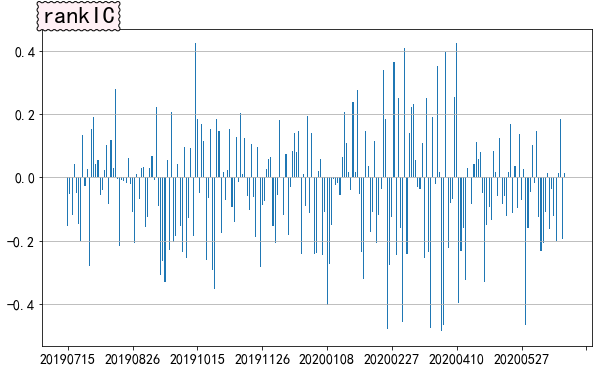

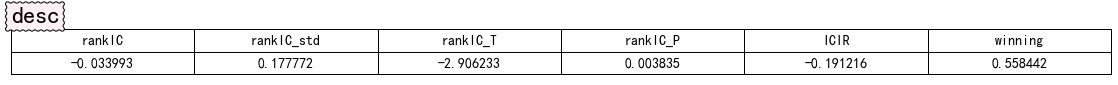

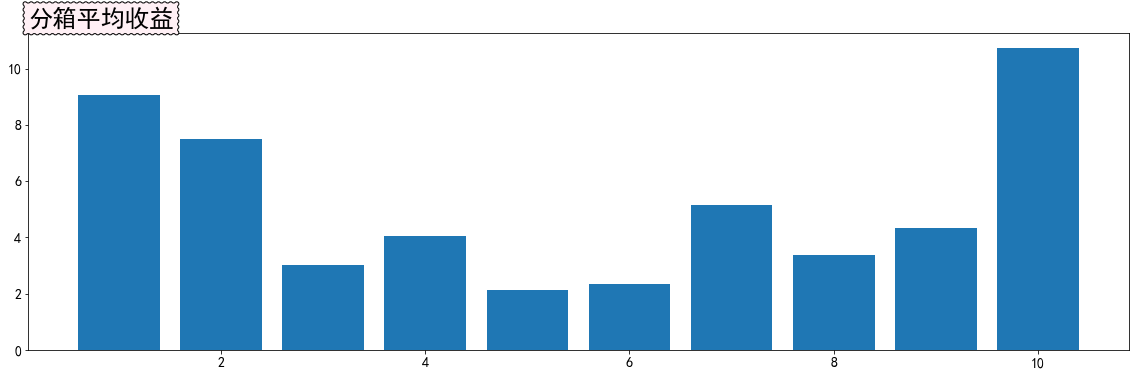

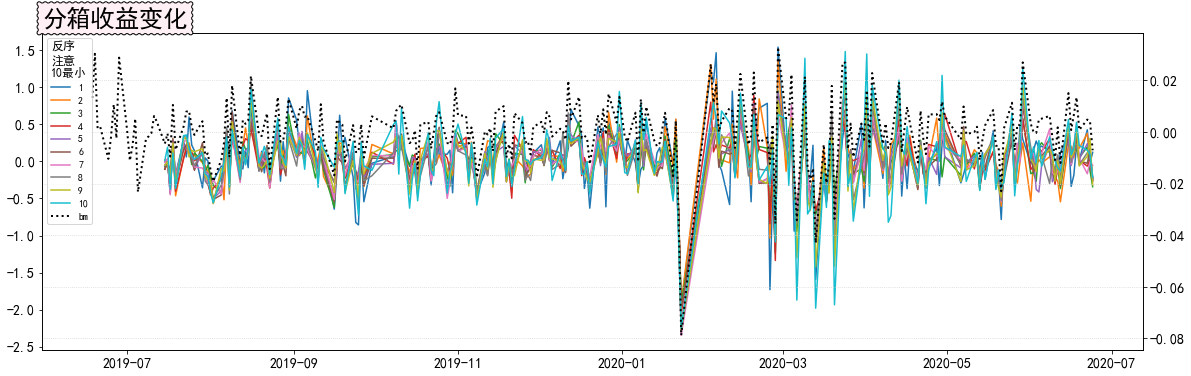

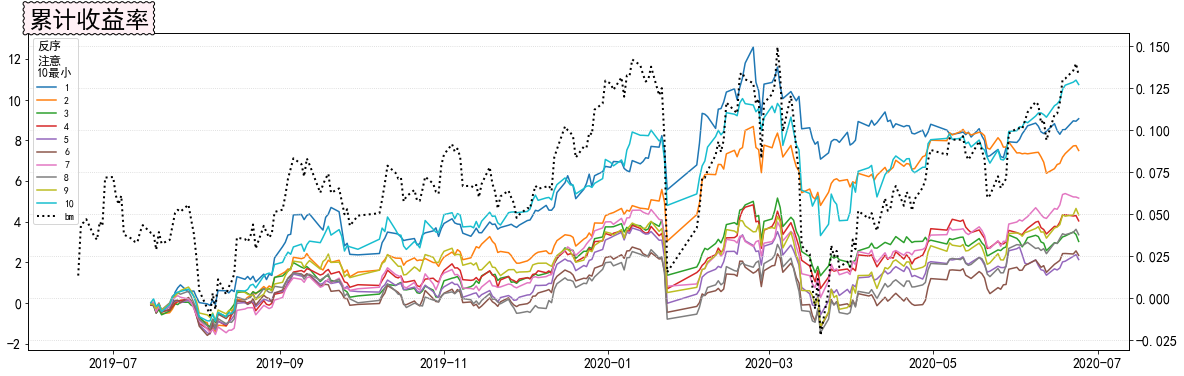

Wall time: 17 s


In [60]:
%%time
from tools.Test_Tools import FactorTest

%load_ext autoreload
%autoreload 1
%aimport tools.Test_Tools

test1 = FactorTest(BIAS, sample='沪深300', freq="d",end='2020-06-29',gap=250,only_main=True,neutralize={'enable':True,'static_mv':False},target_field='BIAS')
test1.process()
test1.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


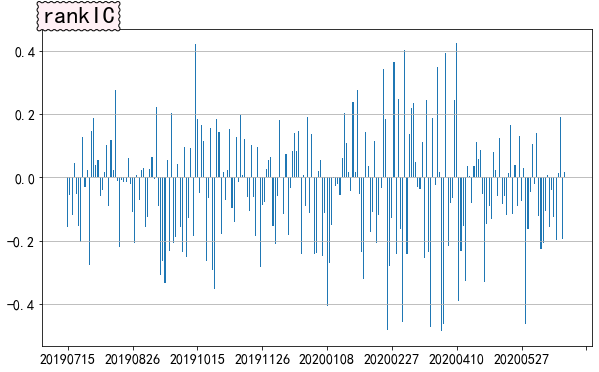

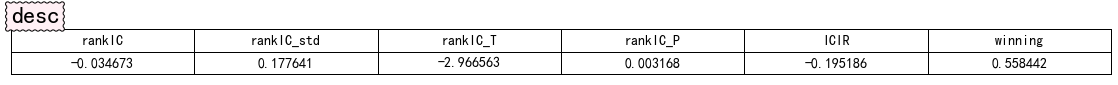

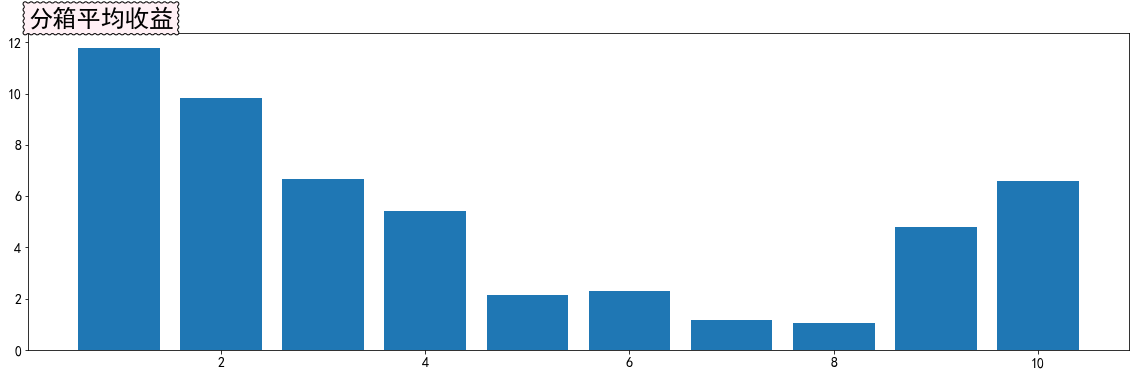

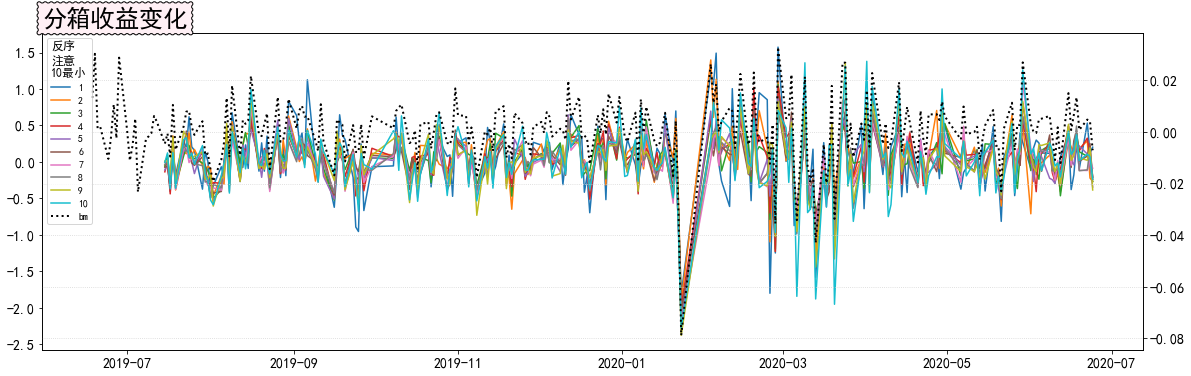

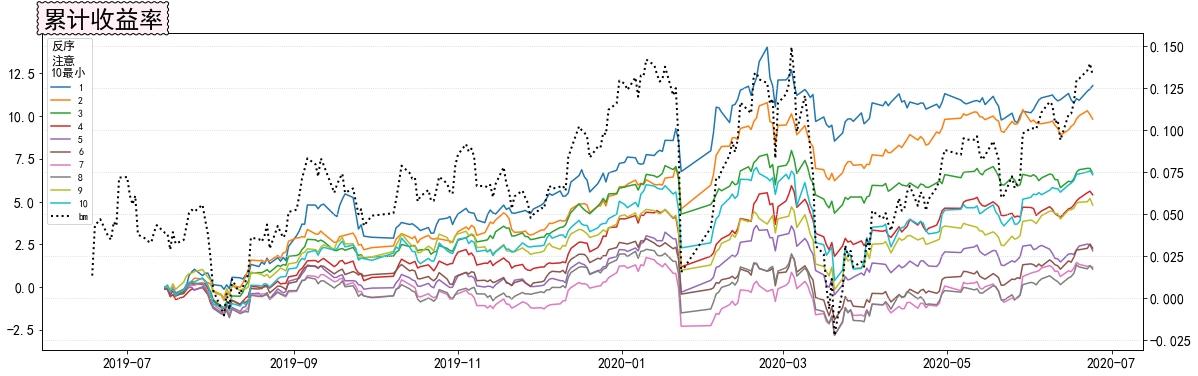

Wall time: 11.9 s


In [61]:
%%time
from tools.Test_Tools import FactorTest

%load_ext autoreload
%autoreload 1
%aimport tools.Test_Tools

test1 = FactorTest(BIAS, sample='沪深300', freq="d",end='2020-06-29',gap=250,only_main=True,neutralize={'enable':False,'static_mv':False},target_field='BIAS')
test1.process()
test1.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


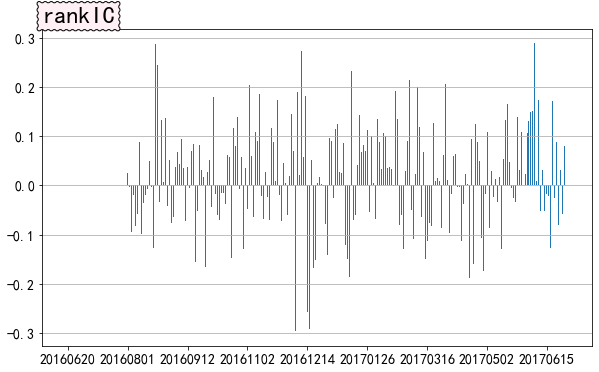

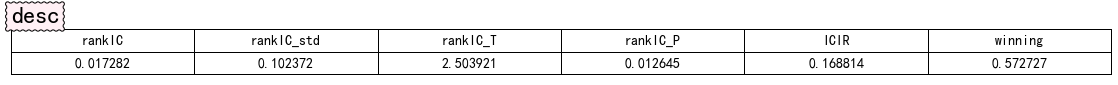

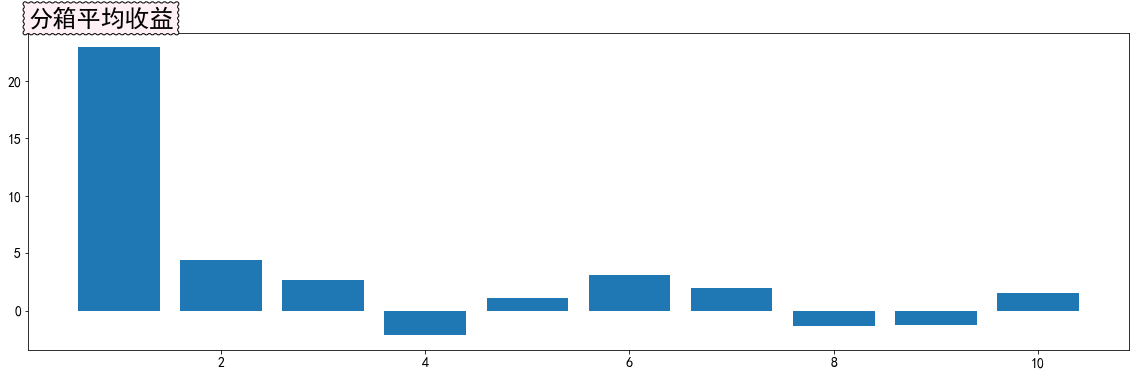

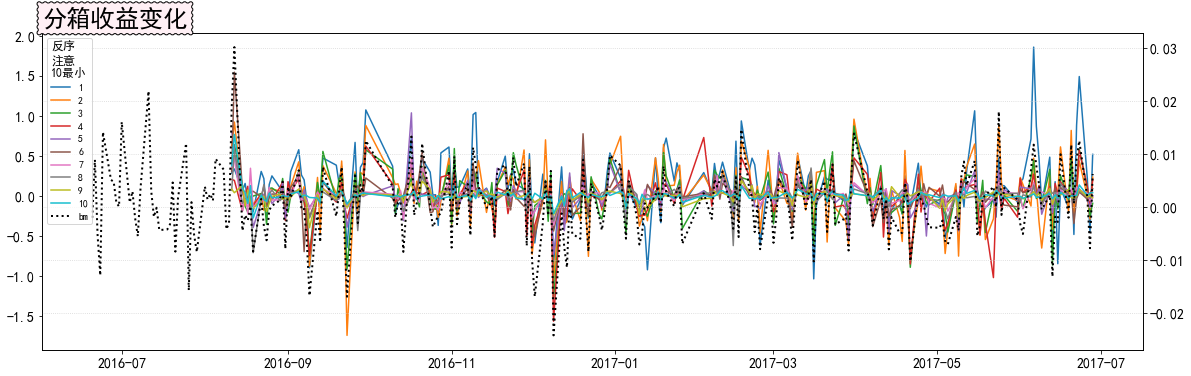

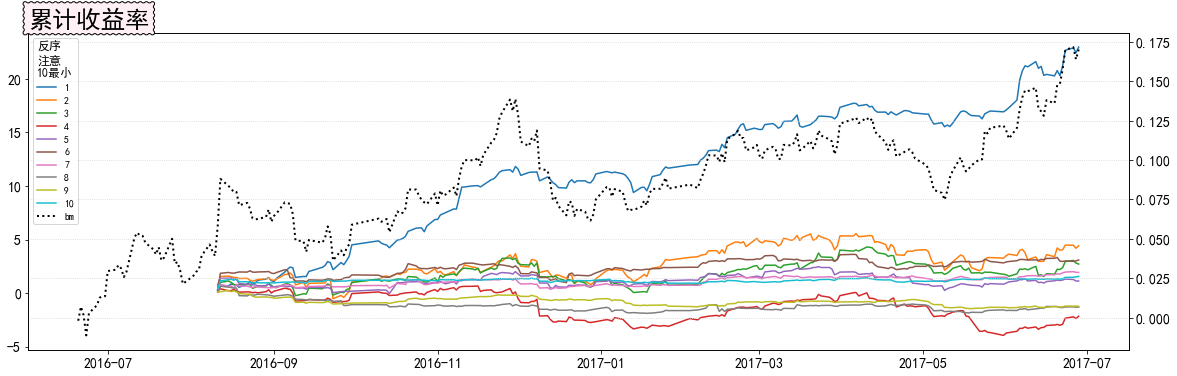

Wall time: 8.82 s


In [149]:
%%time
import sys
import os 
module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path)
    
from tools.Test_Tools import FactorTest

%load_ext autoreload
%autoreload 1
%aimport tools.Test_Tools

test1 = FactorTest(BIAS, sample='沪深300', freq="d",end='2017-06-29',gap=250,only_main=True,neutralize={'enable':False,'static_mv':False},target_field='feature_BIAS_CONTINUITY_NEG_ABS')
test1.process()
test1.plot()

In [161]:
test1.ind_ret_df['feature_BIAS_CONTINUITY']

date        code  
2016-06-20  000001     0
            000063     0
            000066     0
            000069     0
            000100     0
                      ..
2017-06-28  603833    -9
            603899   -14
            603939    -1
            603986   -18
            603993    -4
Name: feature_BIAS_CONTINUITY, Length: 54749, dtype: int32